In [2]:
import numpy as np
import pandas as pd #data processing
import seaborn as sns #Visualization

### Import all datasets

In [3]:
guests = pd.read_csv("Guests.csv")
hotel = pd.read_csv("RefHotel.csv")
survey = pd.read_csv("Survey Responses.csv")
stays = pd.read_csv("Stays.csv")

In [4]:
guests.head()

,GuestID,GuestCountry,GuestSubregion,GuestRegion,Gender,Generation,VIPGuestIndicator
0,38DB8F56-9475-4459-8CEF-94B4BD0F3BC4,Germany,Europe,EMEA,M,Millennial,0
1,51E5EE68-D2E0-4EA6-A4DC-0A2042EB2D14,Germany,Europe,EMEA,M,Other,0
2,064145FD-B3C6-4280-8F75-99A27604FF01,Germany,Europe,EMEA,F,Other,0
3,08193015-49A4-4E3E-9A96-0E8F6D8FDBFF,Germany,Europe,EMEA,M,GenX,0
4,CBD3FD6B-BC9E-4AC5-830A-47D9D31B34F1,Egypt,Middle East / Africa,EMEA,M,GenX,0


In [5]:
stays.head()

,GuestID,ConfirmationNumber,SurveyID,BookDate,ArrivalDate,DepartureDate,PropertyID,SubmarketCategory,BookingMethod,RoomCategoryStayed,TravelPurpose,RoomNights,RoomRevenue,TotalRevenue
0,03ACF42A-E5B4-4375-8927-000070787541,VAI14009400,VAI314009400,2022-02-11,2022-05-26,2022-05-29,VAI,Group,Hotel Direct,Hotel Guest Room,Leisure,3,1635.000000,2537.990000
1,A398F905-A339-4F7C-8CF0-0000B13AF3AE,ATL18683424,ATL318683424,2022-09-12,2022-10-08,2022-10-09,ATL,Retail,Fine Hotels & Resorts,Hotel Guest Room,Unknown,1,273.390594,593.200594
2,6A2D59DB-29D9-42E5-A9F5-0000D97A4573,MAR6285357,MAR306285357,2022-09-28,2022-10-19,2022-10-23,MAR,Discount,OTA,Hotel Guest Room,Unknown,4,1697.563708,1697.563708
3,2E39B990-5C90-41C9-8C88-0001031AEE60,MAU14379940,MAU314379940,2022-07-05,2022-07-16,2022-07-21,MAU,Retail,Fine Hotels & Resorts,Hotel Guest Room,Unknown,5,7847.165497,10657.173386
4,2E39B990-5C90-41C9-8C88-0001031AEE60,PAR29691306,PAR329691306,2022-03-09,2022-03-19,2022-03-22,PAR,Retail,Fine Hotels & Resorts,Hotel Guest Room,Unknown,3,5469.376461,5944.002648


In [6]:
survey.head()

,SurveyID,Response Date,Overall Hotel Likely Recommend,Personal Recognition,Staff Deliver on Preferences,Cleanliness,Mobile App and Chat
0,DEN300795805,2022-04-27,10,10.0,8.0,10.0,NaN
1,SKO337735094,2019-06-27,10,10.0,10.0,NaN,NaN
2,LAN302362174,2022-06-10,10,10.0,10.0,10.0,NaN
3,DEN300800929,2022-04-04,6,6.0,8.0,10.0,NaN
4,OAH303281038,2022-02-22,9,10.0,9.0,10.0,NaN


In [7]:
hotel.head()

,HotelCd,HotelNm,HotelShortNm,StatusCd,PropertyTypeCd,CountryNm,HotelSubregion,HotelRegion
0,ABS,Four Seasons Hotel Abu Dhabi at Al Maryah Island,Abu Dhabi,A,U,United Arab Emirates,Middle East / Africa,EMEA
1,AIL,Four Seasons Resort Anguilla,Anguilla,A,R,Anguilla,Other Americas,Americas
2,ALX,"Four Seasons Hotel Alexandria at San Stefano, ...",Alexandria,A,U,Egypt,Middle East / Africa,EMEA
3,AMM,Four Seasons Hotel Amman,Amman,A,U,Jordan,Middle East / Africa,EMEA
4,APL,"Four Seasons Hotel Astir Palace, Athens","Athens, Astir Palace",A,R,Greece,Europe,EMEA


In [8]:
guests.head()

,GuestID,GuestCountry,GuestSubregion,GuestRegion,Gender,Generation,VIPGuestIndicator
0,38DB8F56-9475-4459-8CEF-94B4BD0F3BC4,Germany,Europe,EMEA,M,Millennial,0
1,51E5EE68-D2E0-4EA6-A4DC-0A2042EB2D14,Germany,Europe,EMEA,M,Other,0
2,064145FD-B3C6-4280-8F75-99A27604FF01,Germany,Europe,EMEA,F,Other,0
3,08193015-49A4-4E3E-9A96-0E8F6D8FDBFF,Germany,Europe,EMEA,M,GenX,0
4,CBD3FD6B-BC9E-4AC5-830A-47D9D31B34F1,Egypt,Middle East / Africa,EMEA,M,GenX,0


### Create a master dataset 
Here I'll join the guests, RefHotel and Survey tables to Stays to create a master dataframe.
The rationale is:
 * Guests can be joined to the stays table using its primary key - Guest ID which is a foreign key in Stays
 * Survey Responses can be joined to stays table using its primary - Survey ID which is a foreign key in Stays
 * RefHotel can be joined to stays table using using its primary key - HotelCD which is a foreign key (PropertyID) in Stays
 
-- I am using a left join to ensures all records from stays are preserved, even if matching rows in other tables don't exist


In [10]:
# 1. Join Stays with Guests using GuestID
stays_guests = pd.merge(
    stays, guests,
    how='left', 
    on='GuestID'
)

# 2. Join the result with RefHotel using PropertyID and HotelCd
stays_guests_hotels = pd.merge(
    stays_guests, hotel,
    how='left', 
    left_on='PropertyID',  
    right_on='HotelCd'    
)

# 3. Join the result with Survey Responses using SurveyID
master = pd.merge(
    stays_guests_hotels, survey,
    how='left',  # Left join
    on='SurveyID'
)


In [9]:
master.head()

,GuestID,ConfirmationNumber,SurveyID,BookDate,ArrivalDate,DepartureDate,PropertyID,SubmarketCategory,BookingMethod,RoomCategoryStayed,...,PropertyTypeCd,CountryNm,HotelSubregion,HotelRegion,Response Date,Overall Hotel Likely Recommend,Personal Recognition,Staff Deliver on Preferences,Cleanliness,Mobile App and Chat
0,03ACF42A-E5B4-4375-8927-000070787541,VAI14009400,VAI314009400,2022-02-11,2022-05-26,2022-05-29,VAI,Group,Hotel Direct,Hotel Guest Room,...,R,United States,US,Americas,NaN,NaN,NaN,NaN,NaN,NaN
1,A398F905-A339-4F7C-8CF0-0000B13AF3AE,ATL18683424,ATL318683424,2022-09-12,2022-10-08,2022-10-09,ATL,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,U,United States,US,Americas,NaN,NaN,NaN,NaN,NaN,NaN
2,6A2D59DB-29D9-42E5-A9F5-0000D97A4573,MAR6285357,MAR306285357,2022-09-28,2022-10-19,2022-10-23,MAR,Discount,OTA,Hotel Guest Room,...,U,Japan,APAC (excl China),APAC,NaN,NaN,NaN,NaN,NaN,NaN
3,2E39B990-5C90-41C9-8C88-0001031AEE60,MAU14379940,MAU314379940,2022-07-05,2022-07-16,2022-07-21,MAU,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,R,United States,US,Americas,NaN,NaN,NaN,NaN,NaN,NaN
4,2E39B990-5C90-41C9-8C88-0001031AEE60,PAR29691306,PAR329691306,2022-03-09,2022-03-19,2022-03-22,PAR,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,U,France,Europe,EMEA,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#check if propertyid and hotelcd values match
master['Match'] = master['PropertyID'].isin(hotel['HotelCd'])
master.head()

,GuestID,ConfirmationNumber,SurveyID,BookDate,ArrivalDate,DepartureDate,PropertyID,SubmarketCategory,BookingMethod,RoomCategoryStayed,...,CountryNm,HotelSubregion,HotelRegion,Response Date,Overall Hotel Likely Recommend,Personal Recognition,Staff Deliver on Preferences,Cleanliness,Mobile App and Chat,Match
0,03ACF42A-E5B4-4375-8927-000070787541,VAI14009400,VAI314009400,2022-02-11,2022-05-26,2022-05-29,VAI,Group,Hotel Direct,Hotel Guest Room,...,United States,US,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True
1,A398F905-A339-4F7C-8CF0-0000B13AF3AE,ATL18683424,ATL318683424,2022-09-12,2022-10-08,2022-10-09,ATL,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,United States,US,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True
2,6A2D59DB-29D9-42E5-A9F5-0000D97A4573,MAR6285357,MAR306285357,2022-09-28,2022-10-19,2022-10-23,MAR,Discount,OTA,Hotel Guest Room,...,Japan,APAC (excl China),APAC,NaN,NaN,NaN,NaN,NaN,NaN,True
3,2E39B990-5C90-41C9-8C88-0001031AEE60,MAU14379940,MAU314379940,2022-07-05,2022-07-16,2022-07-21,MAU,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,United States,US,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True
4,2E39B990-5C90-41C9-8C88-0001031AEE60,PAR29691306,PAR329691306,2022-03-09,2022-03-19,2022-03-22,PAR,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,France,Europe,EMEA,NaN,NaN,NaN,NaN,NaN,NaN,True


# Feature Engineering
1. Create a column that idenfifies if guests travel locally or internationally
2. Create a separate dataframe for returning guests 

#### 1. Identify if guests travel locally or internationally
- Compare the guest's country to the hotel's country
- If the entries are the same, assign string "Domestic", if values are different, assign "Foreign"
- Store the assigned entries in a new column "Trip type"

In [12]:
master.columns

Index(['GuestID', 'ConfirmationNumber', 'SurveyID', 'BookDate', 'ArrivalDate',
       'DepartureDate', 'PropertyID', 'SubmarketCategory', 'BookingMethod',
       'RoomCategoryStayed', 'TravelPurpose', 'RoomNights', 'RoomRevenue',
       'TotalRevenue', 'GuestCountry', 'GuestSubregion', 'GuestRegion',
       'Gender', 'Generation', 'VIPGuestIndicator', 'HotelCd', 'HotelNm',
       'HotelShortNm', 'StatusCd', 'PropertyTypeCd', 'CountryNm',
       'HotelSubregion', 'HotelRegion', 'Response Date',
       'Overall Hotel Likely Recommend', 'Personal Recognition',
       'Staff Deliver on Preferences', 'Cleanliness', 'Mobile App and Chat',
       'Match'],
      dtype='object')

In [13]:
master['TravelType'] = master.apply(
    lambda row: 'Domestic' if row['GuestCountry'] == row['CountryNm'] else 'Foreign',
    axis=1
)

In [14]:
master["TravelType"].value_counts()

Domestic    230680
Foreign     192411
Name: TravelType, dtype: int64

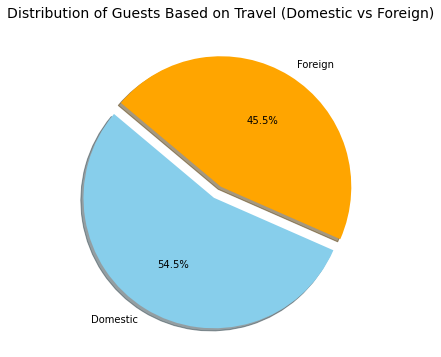

In [15]:
#Pie chart of local vs foreign guests
import matplotlib.pyplot as plt

# Count the occurrences of each TravelType
travel_type_counts = master['TravelType'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
travel_type_counts.plot.pie(
    autopct='%1.1f%%',  # Display percentages with 1 decimal place
    labels=travel_type_counts.index,  # Labels for the slices
    colors=['skyblue', 'orange'],  # Customize slice colors
    startangle=140,  # Rotate the chart for better view
    explode=(0.1, 0),  # Slightly separate the 'Domestic' slice
    shadow=True  # Add shadow for better visual appeal
)

# Add a title
plt.title('Distribution of Guests Based on Travel (Domestic vs Foreign)', fontsize=14)

# Show the chart
plt.ylabel('')  # Remove default y-axis label
plt.show()

### 2. Identify Returning guests 
- Here, I identify returning guests by performing an aggregation on guest ID and then grouping by the count of visits
- The returning guests are stored in a new dataframe called "returning_guests"
- Returning_guests contains demographic information of all returning guests

In [16]:
# Aggregate and count visits for each GuestID
returning = master.groupby('GuestID').size().reset_index(name='VisitCount')

# Filter for guests with more than one visit
returning = returning[returning['VisitCount'] > 1]


In [17]:
returning 

,GuestID,VisitCount
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,8
5,000356A7-C2C6-4626-A280-98ECEAB88E4B,3
7,0003D34F-A763-44F3-9E0C-AA7DBE9EB439,2
8,000461E4-3F19-4EE4-9247-4E1D054FD5F3,5
9,0004DAE9-9FB6-4207-B488-968A6A299653,2
...,...,...
199991,FFFCC697-B8F6-44FE-96CE-3D99B9AD8D78,2
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,3
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,2
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,8


In [18]:
#create a new dataframe: returning guests that has all information of returning guests
returning_df = returning["GuestID"]

In [ ]:
returning_df

In [19]:
returning_guests = pd.DataFrame(returning_df)

In [20]:
returning_guests

,GuestID
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD
5,000356A7-C2C6-4626-A280-98ECEAB88E4B
7,0003D34F-A763-44F3-9E0C-AA7DBE9EB439
8,000461E4-3F19-4EE4-9247-4E1D054FD5F3
9,0004DAE9-9FB6-4207-B488-968A6A299653
...,...
199991,FFFCC697-B8F6-44FE-96CE-3D99B9AD8D78
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82


In [21]:
# Perform an inner join between 'returning_df' and guests on 'GuestID'
returning_guests = pd.merge(
    guests,
    returning_df,
    on='GuestID',
    how='inner'
)

In [22]:
returning_guests

,GuestID,GuestCountry,GuestSubregion,GuestRegion,Gender,Generation,VIPGuestIndicator
0,CBD3FD6B-BC9E-4AC5-830A-47D9D31B34F1,Egypt,Middle East / Africa,EMEA,M,GenX,0
1,E301939D-8F0A-4304-9869-743C93E38098,Spain,Europe,EMEA,M,Boomer,0
2,C9080FE6-E3D4-4641-B800-845DEC6B48EA,Spain,Europe,EMEA,U,Other,0
3,6F7D8ABD-6069-46A1-AFAC-0444E7153CA0,Lithuania,Europe,EMEA,M,GenX,0
4,4571EFDD-C502-4757-B67A-0E0EB7766938,Kuwait,Middle East / Africa,EMEA,U,Other,0
...,...,...,...,...,...,...,...
64612,2EE2A80E-EF78-4670-946F-B6A327DEF726,United States,United States,Americas,M,Other,0
64613,6A49E86B-21D0-4AA8-8240-5816CEF6486B,United States,United States,Americas,M,Other,0
64614,31186E24-1C52-4D4A-BE6E-C2AF495AD87B,United States,United States,Americas,M,Other,0
64615,EF5C2258-9DB6-441E-B3E5-23EF0C0DBC32,United States,United States,Americas,F,Other,0


### What percentage of total guests are returning guests ?
- Create a column in master df, called returning
- Create a condition that checks if the guest_id is present in returning_df
- If present, assign "yes", absent "no"

In [23]:
# Create a set of returning GuestIDs for faster lookup
returning_guest_ids = set(returning['GuestID'])

# Create the 'returning' column in master
master['returning'] = master['GuestID'].apply(lambda x: 'yes' if x in returning_guest_ids else 'no')

In [24]:
master.head()

,GuestID,ConfirmationNumber,SurveyID,BookDate,ArrivalDate,DepartureDate,PropertyID,SubmarketCategory,BookingMethod,RoomCategoryStayed,...,HotelRegion,Response Date,Overall Hotel Likely Recommend,Personal Recognition,Staff Deliver on Preferences,Cleanliness,Mobile App and Chat,Match,TravelType,returning
0,03ACF42A-E5B4-4375-8927-000070787541,VAI14009400,VAI314009400,2022-02-11,2022-05-26,2022-05-29,VAI,Group,Hotel Direct,Hotel Guest Room,...,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True,Domestic,no
1,A398F905-A339-4F7C-8CF0-0000B13AF3AE,ATL18683424,ATL318683424,2022-09-12,2022-10-08,2022-10-09,ATL,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True,Domestic,no
2,6A2D59DB-29D9-42E5-A9F5-0000D97A4573,MAR6285357,MAR306285357,2022-09-28,2022-10-19,2022-10-23,MAR,Discount,OTA,Hotel Guest Room,...,APAC,NaN,NaN,NaN,NaN,NaN,NaN,True,Foreign,no
3,2E39B990-5C90-41C9-8C88-0001031AEE60,MAU14379940,MAU314379940,2022-07-05,2022-07-16,2022-07-21,MAU,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True,Foreign,yes
4,2E39B990-5C90-41C9-8C88-0001031AEE60,PAR29691306,PAR329691306,2022-03-09,2022-03-19,2022-03-22,PAR,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,EMEA,NaN,NaN,NaN,NaN,NaN,NaN,True,Foreign,yes


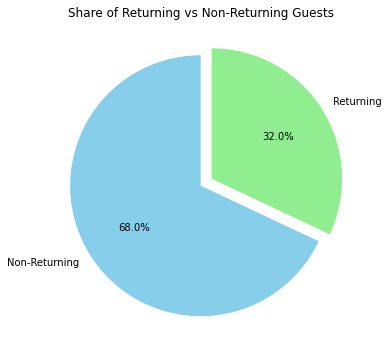

In [25]:
import matplotlib.pyplot as plt

# Calculate the distribution of returning and non-returning guests
returning_distribution = master['returning'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
returning_distribution.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen'],
    labels=['Non-Returning', 'Returning'],
    explode=(0, 0.1)  # Slightly separate the "Returning" segment for emphasis
)

plt.title("Share of Returning vs Non-Returning Guests")
plt.ylabel('')  # Hide y-axis label for cleaner presentation
plt.show()

### RFM - Recency, Frequency, Monetary Value Analysis
This technique will be used to cluster guests based on their transactional behavior.
1. Recency (R): How recently a customer made a booking. So we get the difference between the maximum/most recent booking date in the dataset (reference) and each guest's last booking date
2. Frequency (F): How often a customer has booked. So just counting the number of bookings for each guest during the period
3. Monetary (M): Total revenue generated by the customer.

In [26]:
# Convert 'BookDate' to datetime format 
master['BookDate'] = pd.to_datetime(master['BookDate'])

# Set the reference date to the maximum booking date
reference_date = master['BookDate'].max()

# Group by GuestID and find the most recent booking date
recency_df = master.groupby('GuestID').agg(LastBookingDate=('BookDate', 'max')).reset_index()

# Calculate Recency as the difference in days from the reference date
recency_df['Recency'] = (reference_date - recency_df['LastBookingDate']).dt.days


In [27]:
recency_df

,GuestID,LastBookingDate,Recency
0,00004B16-79CE-44C0-9608-006761B7038D,2022-08-23,130
1,00013221-5141-4E15-B622-6ACB3FFAFB8E,2022-03-28,278
2,00018D3A-2860-41CB-92F1-8F4DBB1653F5,2022-11-10,51
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,2022-09-21,101
4,0002D32D-AAE0-4B07-92FC-8EF7C2AD3A51,2022-08-24,129
...,...,...,...
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,2022-08-11,142
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,2022-10-11,81
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,2022-12-05,26
199998,FFFF56A6-D10C-4CCD-9CBA-57A0D91F49F6,2022-02-15,319


In [28]:
returning_guests

,GuestID,GuestCountry,GuestSubregion,GuestRegion,Gender,Generation,VIPGuestIndicator
0,CBD3FD6B-BC9E-4AC5-830A-47D9D31B34F1,Egypt,Middle East / Africa,EMEA,M,GenX,0
1,E301939D-8F0A-4304-9869-743C93E38098,Spain,Europe,EMEA,M,Boomer,0
2,C9080FE6-E3D4-4641-B800-845DEC6B48EA,Spain,Europe,EMEA,U,Other,0
3,6F7D8ABD-6069-46A1-AFAC-0444E7153CA0,Lithuania,Europe,EMEA,M,GenX,0
4,4571EFDD-C502-4757-B67A-0E0EB7766938,Kuwait,Middle East / Africa,EMEA,U,Other,0
...,...,...,...,...,...,...,...
64612,2EE2A80E-EF78-4670-946F-B6A327DEF726,United States,United States,Americas,M,Other,0
64613,6A49E86B-21D0-4AA8-8240-5816CEF6486B,United States,United States,Americas,M,Other,0
64614,31186E24-1C52-4D4A-BE6E-C2AF495AD87B,United States,United States,Americas,M,Other,0
64615,EF5C2258-9DB6-441E-B3E5-23EF0C0DBC32,United States,United States,Americas,F,Other,0


### 2. Monetary value: total spend per guest

In [29]:
stays.head()

,GuestID,ConfirmationNumber,SurveyID,BookDate,ArrivalDate,DepartureDate,PropertyID,SubmarketCategory,BookingMethod,RoomCategoryStayed,TravelPurpose,RoomNights,RoomRevenue,TotalRevenue
0,03ACF42A-E5B4-4375-8927-000070787541,VAI14009400,VAI314009400,2022-02-11,2022-05-26,2022-05-29,VAI,Group,Hotel Direct,Hotel Guest Room,Leisure,3,1635.000000,2537.990000
1,A398F905-A339-4F7C-8CF0-0000B13AF3AE,ATL18683424,ATL318683424,2022-09-12,2022-10-08,2022-10-09,ATL,Retail,Fine Hotels & Resorts,Hotel Guest Room,Unknown,1,273.390594,593.200594
2,6A2D59DB-29D9-42E5-A9F5-0000D97A4573,MAR6285357,MAR306285357,2022-09-28,2022-10-19,2022-10-23,MAR,Discount,OTA,Hotel Guest Room,Unknown,4,1697.563708,1697.563708
3,2E39B990-5C90-41C9-8C88-0001031AEE60,MAU14379940,MAU314379940,2022-07-05,2022-07-16,2022-07-21,MAU,Retail,Fine Hotels & Resorts,Hotel Guest Room,Unknown,5,7847.165497,10657.173386
4,2E39B990-5C90-41C9-8C88-0001031AEE60,PAR29691306,PAR329691306,2022-03-09,2022-03-19,2022-03-22,PAR,Retail,Fine Hotels & Resorts,Hotel Guest Room,Unknown,3,5469.376461,5944.002648


In [30]:
# Group by GuestID and calculate the total TotalRevenue for each guest
monetary_df = master.groupby('GuestID').agg(MonetaryValue=('TotalRevenue', 'sum')).reset_index()

In [31]:
monetary_df

,GuestID,MonetaryValue
0,00004B16-79CE-44C0-9608-006761B7038D,298.808702
1,00013221-5141-4E15-B622-6ACB3FFAFB8E,444.867648
2,00018D3A-2860-41CB-92F1-8F4DBB1653F5,0.000000
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,4550.175997
4,0002D32D-AAE0-4B07-92FC-8EF7C2AD3A51,217.653236
...,...,...
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,288.108396
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,10466.409836
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,65804.699991
199998,FFFF56A6-D10C-4CCD-9CBA-57A0D91F49F6,6188.830163


In [32]:
# Merge recency_df and monetary_df on 'GuestID' to combine Recency and MonetaryValue
rfm_df = pd.merge(
    recency_df[['GuestID', 'Recency']], 
    monetary_df[['GuestID', 'MonetaryValue']], 
    on='GuestID', 
    how='inner'
)

# Merge the resulting dataframe with returning_df to add VisitCount
rfm_df = pd.merge(
    rfm_df, 
    returning[['GuestID', 'VisitCount']], 
    on='GuestID', 
    how='left'
)

# Fill any missing values in 'VisitCount' with 1 (first-time guests)
rfm_df['VisitCount'] = rfm_df['VisitCount'].fillna(1)

In [33]:
rfm_df

,GuestID,Recency,MonetaryValue,VisitCount
0,00004B16-79CE-44C0-9608-006761B7038D,130,298.808702,1.0
1,00013221-5141-4E15-B622-6ACB3FFAFB8E,278,444.867648,1.0
2,00018D3A-2860-41CB-92F1-8F4DBB1653F5,51,0.000000,1.0
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,101,4550.175997,8.0
4,0002D32D-AAE0-4B07-92FC-8EF7C2AD3A51,129,217.653236,1.0
...,...,...,...,...
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,142,288.108396,3.0
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,81,10466.409836,2.0
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,26,65804.699991,8.0
199998,FFFF56A6-D10C-4CCD-9CBA-57A0D91F49F6,319,6188.830163,1.0


In [34]:
rfm_df.describe()

,Recency,MonetaryValue,VisitCount
count,200000.000000,2.000000e+05,200000.000000
mean,198.222440,5.115785e+03,2.115455
std,112.650311,2.583799e+04,3.613505
min,0.000000,-1.833577e+04,1.000000
25%,107.000000,3.330000e+02,1.000000
50%,192.000000,1.020489e+03,1.000000
75%,283.000000,3.126026e+03,2.000000
max,1555.000000,3.197130e+06,201.000000


In [35]:
#rename columns
rfm_df.rename(columns={'MonetaryValue': 'TotalSpend'}, inplace=True)

In [36]:
rfm_df

,GuestID,Recency,TotalSpend,VisitCount
0,00004B16-79CE-44C0-9608-006761B7038D,130,298.808702,1.0
1,00013221-5141-4E15-B622-6ACB3FFAFB8E,278,444.867648,1.0
2,00018D3A-2860-41CB-92F1-8F4DBB1653F5,51,0.000000,1.0
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,101,4550.175997,8.0
4,0002D32D-AAE0-4B07-92FC-8EF7C2AD3A51,129,217.653236,1.0
...,...,...,...,...
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,142,288.108396,3.0
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,81,10466.409836,2.0
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,26,65804.699991,8.0
199998,FFFF56A6-D10C-4CCD-9CBA-57A0D91F49F6,319,6188.830163,1.0


### Guests segmentation
Using the RFM analysis, I want to identify guest segments with similar behavior (clusters). I will use
K-means clustering algorithm to find the optimal number of clusters for these guests. The steps are outlined as:
1. Preprocessing:This involves standardizing the data because K-means is sensitive to the scale of features (i.e., differences in units like recency, visit count, and total spend).

2. Elbow Method:Find the optimal number of clusters (K) using the Elbow Method, which helps determine the point at which adding more clusters no longer provides significant benefits.
3. K-means Clustering: Apply K-means clustering with the optimal number of clusters.
4. Analyzing Clusters: Review the cluster centers and interpret the segments.

In [37]:
### Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [36]:
#Plot the distribution of the data
rfm_numerical = rfm_df.select_dtypes(exclude = "object")

In [37]:
rfm_numerical

,Recency,TotalSpend,VisitCount
0,130,298.808702,1.0
1,278,444.867648,1.0
2,51,0.000000,1.0
3,101,4550.175997,8.0
4,129,217.653236,1.0
...,...,...,...
199995,142,288.108396,3.0
199996,81,10466.409836,2.0
199997,26,65804.699991,8.0
199998,319,6188.830163,1.0


In [54]:
# 1. Data Preprocessing - Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm_df[['Recency', 'VisitCount', 'TotalSpend']])


In [55]:
# 2. Elbow Method to determine the optimal number of clusters (K)
inertia = []  # Inertia is the sum of squared distances of samples to their closest cluster center

for k in range(1, 11):  # Checking for K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


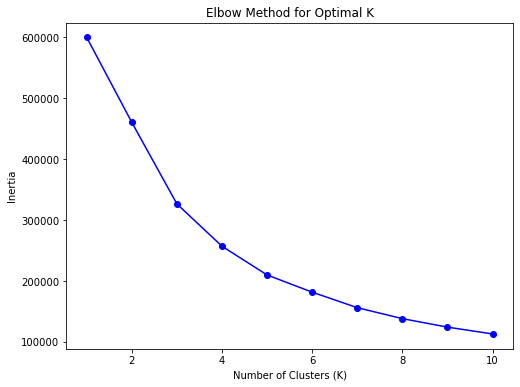

In [56]:
# Plot the elbow curve to find the optimal K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [57]:
### Optimal number of clusters = 3

In [58]:
# Choose the optimal number of clusters (k)
k = 3 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, max_iter=10000)

# Apply K-Means algorithm to the scaled features
kmeans.fit(scaled_features)

KMeans(max_iter=10000, n_clusters=3, random_state=42)

In [59]:
cluster = kmeans.cluster_centers_

In [60]:
kmeans.labels_

array([0, 2, 0, ..., 0, 2, 0], dtype=int32)

In [61]:
rfm_df["GuestClass"] = kmeans.labels_

In [62]:
rfm_df.head()

,GuestID,Recency,TotalSpend,VisitCount,GuestClass
0,00004B16-79CE-44C0-9608-006761B7038D,130,298.808702,1.0,0
1,00013221-5141-4E15-B622-6ACB3FFAFB8E,278,444.867648,1.0,2
2,00018D3A-2860-41CB-92F1-8F4DBB1653F5,51,0.000000,1.0,0
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,101,4550.175997,8.0,0
4,0002D32D-AAE0-4B07-92FC-8EF7C2AD3A51,129,217.653236,1.0,0


In [53]:
rfm_df['GuestClass'].value_counts()

0    105281
2     92246
1      2473
Name: GuestClass, dtype: int64

### Visualize Guest Classes and features

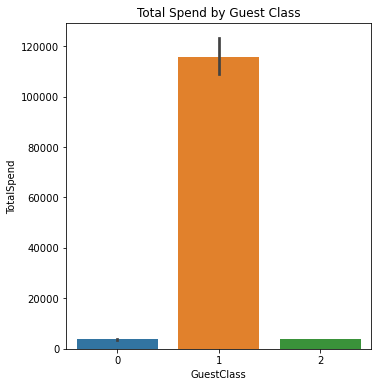

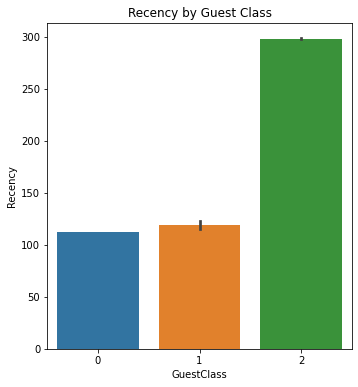

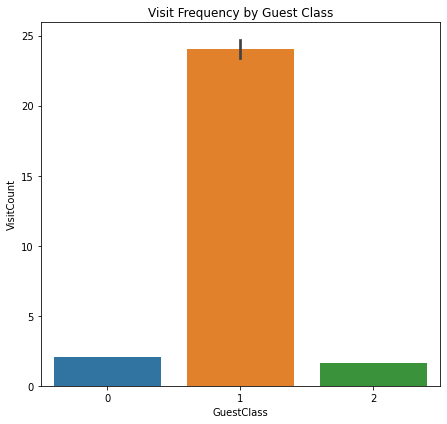

In [63]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='GuestClass', y='TotalSpend', data=rfm_df) 
plt.title('Total Spend by Guest Class')

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='GuestClass', y='Recency', data=rfm_df) 
plt.title('Recency by Guest Class')

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='GuestClass', y='VisitCount', data=rfm_df) 
plt.title('Visit Frequency by Guest Class')

plt.tight_layout()
plt.show()

In [58]:
master.to_csv('master_data.csv', index=False)

In [60]:
master

,GuestID,ConfirmationNumber,SurveyID,BookDate,ArrivalDate,DepartureDate,PropertyID,SubmarketCategory,BookingMethod,RoomCategoryStayed,...,HotelRegion,Response Date,Overall Hotel Likely Recommend,Personal Recognition,Staff Deliver on Preferences,Cleanliness,Mobile App and Chat,Match,TravelType,returning
0,03ACF42A-E5B4-4375-8927-000070787541,VAI14009400,VAI314009400,2022-02-11,2022-05-26,2022-05-29,VAI,Group,Hotel Direct,Hotel Guest Room,...,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True,Domestic,no
1,A398F905-A339-4F7C-8CF0-0000B13AF3AE,ATL18683424,ATL318683424,2022-09-12,2022-10-08,2022-10-09,ATL,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True,Domestic,no
2,6A2D59DB-29D9-42E5-A9F5-0000D97A4573,MAR6285357,MAR306285357,2022-09-28,2022-10-19,2022-10-23,MAR,Discount,OTA,Hotel Guest Room,...,APAC,NaN,NaN,NaN,NaN,NaN,NaN,True,Foreign,no
3,2E39B990-5C90-41C9-8C88-0001031AEE60,MAU14379940,MAU314379940,2022-07-05,2022-07-16,2022-07-21,MAU,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True,Foreign,yes
4,2E39B990-5C90-41C9-8C88-0001031AEE60,PAR29691306,PAR329691306,2022-03-09,2022-03-19,2022-03-22,PAR,Retail,Fine Hotels & Resorts,Hotel Guest Room,...,EMEA,NaN,NaN,NaN,NaN,NaN,NaN,True,Foreign,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423086,AFDF5715-0884-4C4C-BCCA-FFFEA6874335,SFR37728451,SFR337728451,2019-09-12,2019-09-28,2019-10-02,SFR,Discount,FS.COM,Hotel Guest Room,...,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True,Domestic,yes
423087,AFDF5715-0884-4C4C-BCCA-FFFEA6874335,SFR38318713,SFR338318713,2020-01-20,2020-01-22,2020-02-01,SFR,Retail,FS.COM,Hotel Guest Room,...,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True,Domestic,yes
423088,AFDF5715-0884-4C4C-BCCA-FFFEA6874335,SFR37728452,SFR337728452,2019-09-12,2019-09-28,2019-10-02,SFR,Discount,FS.COM,Hotel Guest Room,...,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True,Domestic,yes
423089,AFDF5715-0884-4C4C-BCCA-FFFEA6874335,SFR38846787,SFR338846787,2022-05-20,2022-05-26,2022-06-03,SFR,Discount,Fine Hotels & Resorts,Hotel Guest Room,...,Americas,NaN,NaN,NaN,NaN,NaN,NaN,True,Domestic,yes


### Cluster for returning guests only

In [64]:
rfm_df

,GuestID,Recency,TotalSpend,VisitCount,GuestClass
0,00004B16-79CE-44C0-9608-006761B7038D,130,298.808702,1.0,0
1,00013221-5141-4E15-B622-6ACB3FFAFB8E,278,444.867648,1.0,2
2,00018D3A-2860-41CB-92F1-8F4DBB1653F5,51,0.000000,1.0,0
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,101,4550.175997,8.0,0
4,0002D32D-AAE0-4B07-92FC-8EF7C2AD3A51,129,217.653236,1.0,0
...,...,...,...,...,...
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,142,288.108396,3.0,0
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,81,10466.409836,2.0,0
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,26,65804.699991,8.0,0
199998,FFFF56A6-D10C-4CCD-9CBA-57A0D91F49F6,319,6188.830163,1.0,2


In [67]:
returning

,GuestID,VisitCount
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,8
5,000356A7-C2C6-4626-A280-98ECEAB88E4B,3
7,0003D34F-A763-44F3-9E0C-AA7DBE9EB439,2
8,000461E4-3F19-4EE4-9247-4E1D054FD5F3,5
9,0004DAE9-9FB6-4207-B488-968A6A299653,2
...,...,...
199991,FFFCC697-B8F6-44FE-96CE-3D99B9AD8D78,2
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,3
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,2
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,8


In [68]:
# Filter rfm_df to include only rows where guest_id is in returning DataFrame
returning_rfm = rfm_df[rfm_df['GuestID'].isin(returning['GuestID'])]

In [69]:
returning_rfm

,GuestID,Recency,TotalSpend,VisitCount,GuestClass
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,101,4550.175997,8.0,0
5,000356A7-C2C6-4626-A280-98ECEAB88E4B,133,1481.518577,3.0,0
7,0003D34F-A763-44F3-9E0C-AA7DBE9EB439,359,11432.000270,2.0,2
8,000461E4-3F19-4EE4-9247-4E1D054FD5F3,20,5808.907534,5.0,0
9,0004DAE9-9FB6-4207-B488-968A6A299653,110,9760.358204,2.0,0
...,...,...,...,...,...
199991,FFFCC697-B8F6-44FE-96CE-3D99B9AD8D78,316,1085.579995,2.0,2
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,142,288.108396,3.0,0
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,81,10466.409836,2.0,0
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,26,65804.699991,8.0,0


In [71]:
returning_rfm_df = returning_rfm.drop(columns=['GuestClass'])

In [72]:
returning_rfm_df

,GuestID,Recency,TotalSpend,VisitCount
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,101,4550.175997,8.0
5,000356A7-C2C6-4626-A280-98ECEAB88E4B,133,1481.518577,3.0
7,0003D34F-A763-44F3-9E0C-AA7DBE9EB439,359,11432.000270,2.0
8,000461E4-3F19-4EE4-9247-4E1D054FD5F3,20,5808.907534,5.0
9,0004DAE9-9FB6-4207-B488-968A6A299653,110,9760.358204,2.0
...,...,...,...,...
199991,FFFCC697-B8F6-44FE-96CE-3D99B9AD8D78,316,1085.579995,2.0
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,142,288.108396,3.0
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,81,10466.409836,2.0
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,26,65804.699991,8.0


In [73]:
# 1. Data Preprocessing - Scaling the features
scaler = StandardScaler()
scaled_returning_features = scaler.fit_transform(returning_rfm_df[['Recency', 'VisitCount', 'TotalSpend']])

In [74]:
# 2. Elbow Method to determine the optimal number of clusters (K)
inertia = []  # Inertia is the sum of squared distances of samples to their closest cluster center

for k in range(1, 11):  # Checking for K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_returning_features)
    inertia.append(kmeans.inertia_)


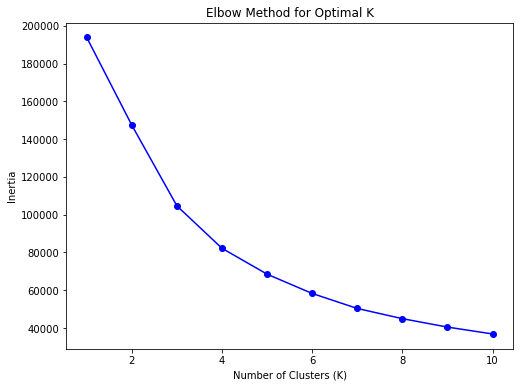

In [75]:
# Plot the elbow curve to find the optimal K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [76]:
# Choose the optimal number of clusters (k)
k = 3 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, max_iter=10000)

# Apply K-Means algorithm to the scaled features
kmeans.fit(scaled_returning_features)

KMeans(max_iter=10000, n_clusters=3, random_state=42)

In [77]:
cluster = kmeans.cluster_centers_

In [78]:
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 1], dtype=int32)

In [79]:
returning_rfm_df["GuestClass"] = kmeans.labels_

In [80]:
returning_rfm_df

,GuestID,Recency,TotalSpend,VisitCount,GuestClass
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,101,4550.175997,8.0,0
5,000356A7-C2C6-4626-A280-98ECEAB88E4B,133,1481.518577,3.0,0
7,0003D34F-A763-44F3-9E0C-AA7DBE9EB439,359,11432.000270,2.0,1
8,000461E4-3F19-4EE4-9247-4E1D054FD5F3,20,5808.907534,5.0,0
9,0004DAE9-9FB6-4207-B488-968A6A299653,110,9760.358204,2.0,0
...,...,...,...,...,...
199991,FFFCC697-B8F6-44FE-96CE-3D99B9AD8D78,316,1085.579995,2.0,1
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,142,288.108396,3.0,0
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,81,10466.409836,2.0,0
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,26,65804.699991,8.0,0


In [81]:
returning_rfm_df['GuestClass'].value_counts()

0    36188
1    27000
2     1429
Name: GuestClass, dtype: int64

### Visualize classes and features

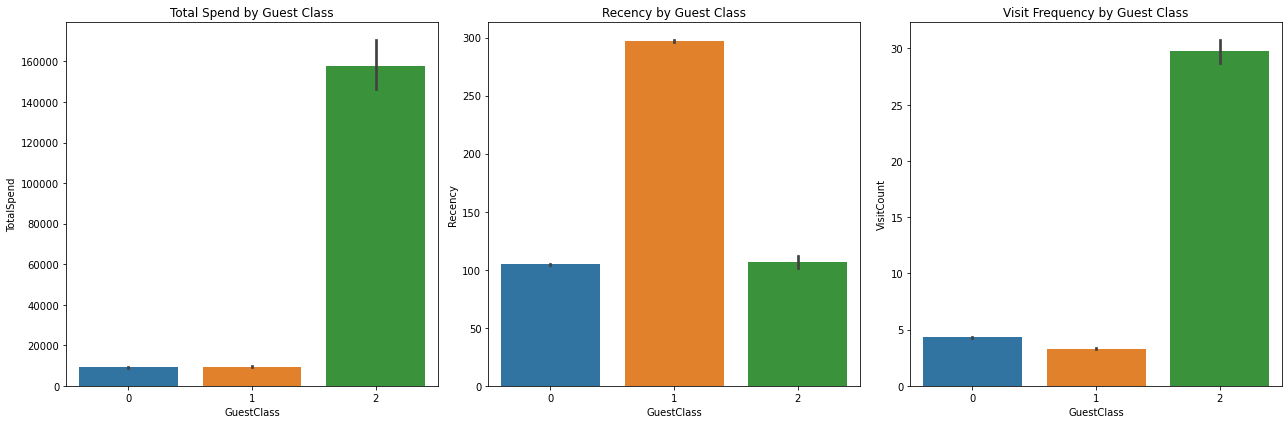

In [82]:
# Set the overall figure size
plt.figure(figsize=(18, 6))

# First chart: Total Spend by Guest Class
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.barplot(x='GuestClass', y='TotalSpend', data=returning_rfm_df)
plt.title('Total Spend by Guest Class')

# Second chart: Recency by Guest Class
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.barplot(x='GuestClass', y='Recency', data=returning_rfm_df)
plt.title('Recency by Guest Class')

# Third chart: Visit Frequency by Guest Class
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.barplot(x='GuestClass', y='VisitCount', data=returning_rfm_df)
plt.title('Visit Frequency by Guest Class')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the charts
plt.show()

In [ ]:
# Cluster 0 - Low total spend, low recency (100 days) and low frequency (56% returning guests)
# Cluster 1 - Low total spend, very high recency and low frequency (42% of returning guests)
# Cluster 2 - extremely high total spend, low recency and very high frequency (2% of returning guests)

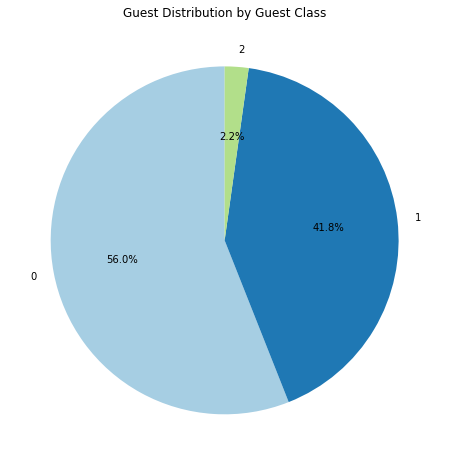

In [83]:
# Count the occurrences of each guest class
guest_class_counts = returning_rfm_df['GuestClass'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
guest_class_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    labels=guest_class_counts.index, 
    colors=plt.cm.Paired.colors
)

# Add a title
plt.title("Guest Distribution by Guest Class")

# Display the chart
plt.ylabel('')  # Remove the y-axis label for better aesthetics
plt.show()

In [118]:
#save the returning dataframe
returning_guests.to_csv('returning_data.csv', index=False)

In [116]:
#save the rfm dataframe
rfm_df.to_csv("rfm_data.csv", index=False)

,GuestID,GuestCountry,GuestSubregion,GuestRegion,Gender,Generation,VIPGuestIndicator
0,CBD3FD6B-BC9E-4AC5-830A-47D9D31B34F1,Egypt,Middle East / Africa,EMEA,M,GenX,0
1,E301939D-8F0A-4304-9869-743C93E38098,Spain,Europe,EMEA,M,Boomer,0
2,C9080FE6-E3D4-4641-B800-845DEC6B48EA,Spain,Europe,EMEA,U,Other,0
3,6F7D8ABD-6069-46A1-AFAC-0444E7153CA0,Lithuania,Europe,EMEA,M,GenX,0
4,4571EFDD-C502-4757-B67A-0E0EB7766938,Kuwait,Middle East / Africa,EMEA,U,Other,0
...,...,...,...,...,...,...,...
64612,2EE2A80E-EF78-4670-946F-B6A327DEF726,United States,United States,Americas,M,Other,0
64613,6A49E86B-21D0-4AA8-8240-5816CEF6486B,United States,United States,Americas,M,Other,0
64614,31186E24-1C52-4D4A-BE6E-C2AF495AD87B,United States,United States,Americas,M,Other,0
64615,EF5C2258-9DB6-441E-B3E5-23EF0C0DBC32,United States,United States,Americas,F,Other,0


In [85]:
returning_rfm_df['GuestClass'].value_counts()

0    36188
1    27000
2     1429
Name: GuestClass, dtype: int64

In [86]:
#save the returning dataframe
returning_rfm_df.to_csv('returning_data.csv', index=False)

In [87]:
returning_rfm_df

,GuestID,Recency,TotalSpend,VisitCount,GuestClass
3,0001BF51-F9A2-4A7B-8DA7-83059534CEBD,101,4550.175997,8.0,0
5,000356A7-C2C6-4626-A280-98ECEAB88E4B,133,1481.518577,3.0,0
7,0003D34F-A763-44F3-9E0C-AA7DBE9EB439,359,11432.000270,2.0,1
8,000461E4-3F19-4EE4-9247-4E1D054FD5F3,20,5808.907534,5.0,0
9,0004DAE9-9FB6-4207-B488-968A6A299653,110,9760.358204,2.0,0
...,...,...,...,...,...
199991,FFFCC697-B8F6-44FE-96CE-3D99B9AD8D78,316,1085.579995,2.0,1
199995,FFFE29BF-5EDE-4326-8889-70BFAA88CB9E,142,288.108396,3.0,0
199996,FFFE4D8F-FCC8-4C90-A48F-A9BA4B27C337,81,10466.409836,2.0,0
199997,FFFE98CE-0037-47C7-95FD-91AE54835C82,26,65804.699991,8.0,0
